In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

from pyhhmm.gaussian import GaussianHMM


In [66]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2024-07-20"
symbol = "BTC-USD"

data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [67]:
df = data[["Open", "High", "Low", "Adj Close", "Volume"]]
df = df.reset_index()

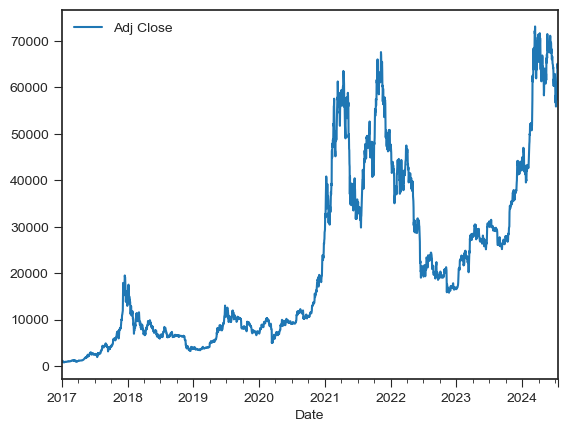

In [68]:
df.plot(x = "Date", y = "Adj Close")
plt.show()

In [69]:
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)


In [70]:
df

,Date,Open,High,Low,Adj Close,Volume,Returns,Range
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,222184992,0.023464,0.034803
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,185168000,0.021620,0.022005
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,344945984,0.106233,0.110130
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,510199008,-0.122410,0.308302
5,2017-01-06,1014.239990,1046.810059,883.943970,902.200989,351876000,-0.109711,0.184249
...,...,...,...,...,...,...,...,...
2751,2024-07-14,59225.250000,61329.527344,59225.250000,60787.792969,22223416061,0.026267,0.035530
2752,2024-07-15,60815.457031,64870.152344,60704.929688,64870.152344,38094526099,0.067158,0.068614
2753,2024-07-16,64784.417969,65354.339844,62487.968750,65097.148438,41617346768,0.003499,0.045871
2754,2024-07-17,65091.832031,66066.734375,63896.085938,64118.792969,32525071311,-0.015029,0.033972


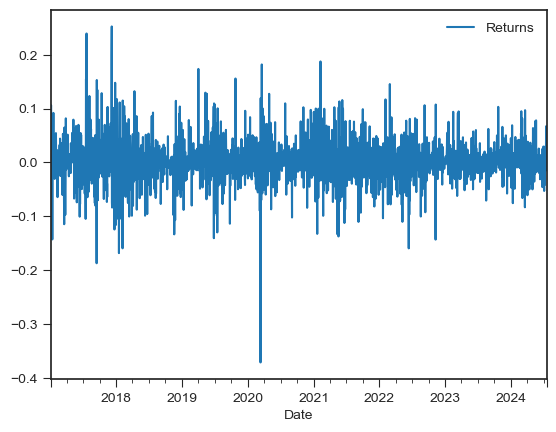

In [72]:
df.plot(x = "Date", y = "Returns")
plt.show()

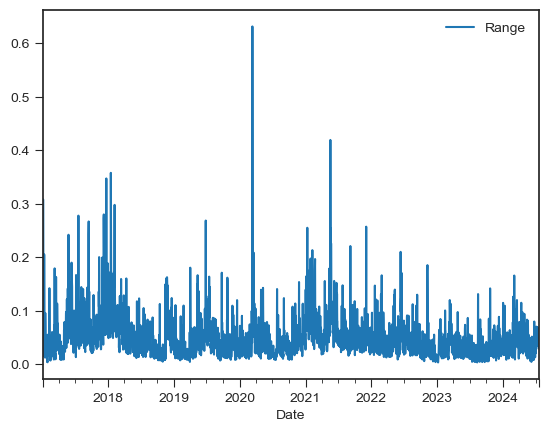

In [73]:
df.plot(x = "Date", y = "Range")
plt.show()